# Sales Predictor

## Importing the Libraries

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## Loading the Dataset

In [2]:
df = pd.read_csv("/content/advertising.csv")
df.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [3]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

## Exploring the Data

Text(0.5, 1.0, 'Outliers')

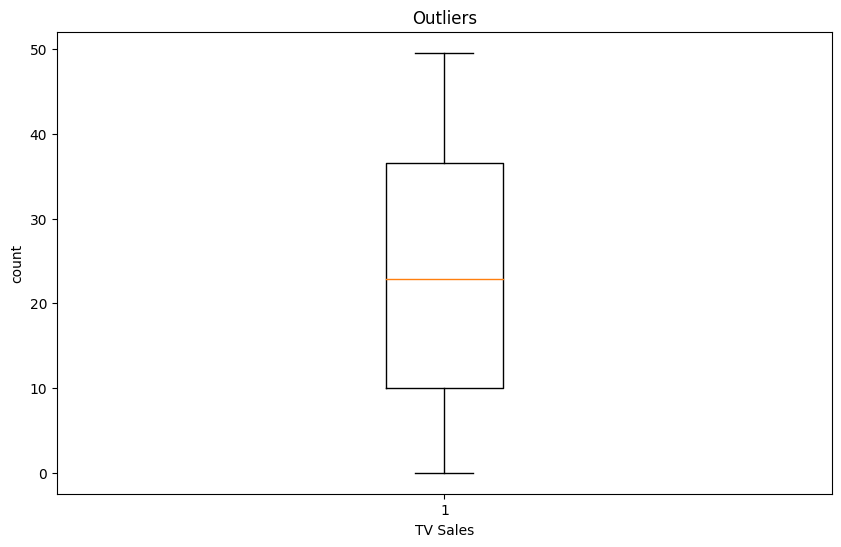

In [8]:
plt.figure(figsize = (10,6))

plt.boxplot(df["Radio"])
plt.xlabel("TV Sales")
plt.ylabel("count")
plt.title("Outliers")

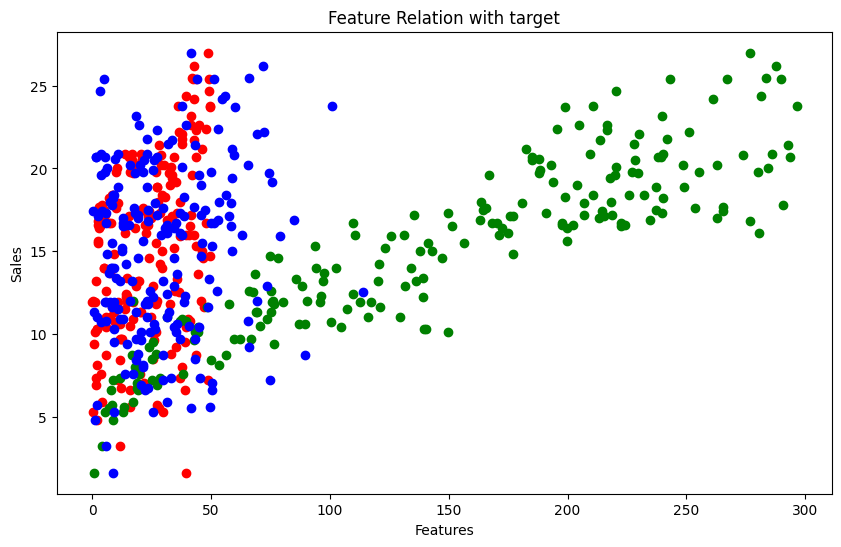

In [17]:
plt.figure(figsize = (10,6))

plt.scatter(df["Radio"], df["Sales"], c ="r")
plt.scatter(df["TV"], df["Sales"], c ="g")
plt.scatter(df["Newspaper"], df["Sales"], c = 'b')

plt.xlabel("Features")
plt.ylabel("Sales")
plt.title("Feature Relation with target");

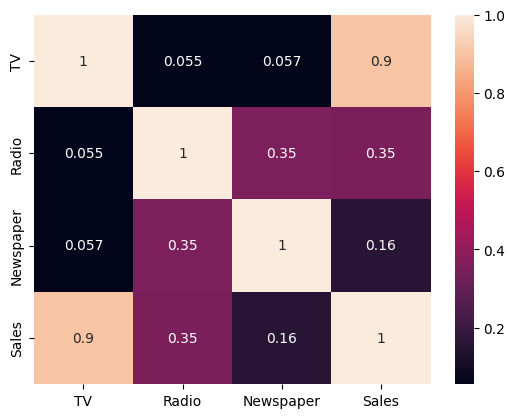

In [19]:
sns.heatmap(df.corr(), annot = True)
plt.show()

Observing both the graphs `sales`  has a strong correlation with `TV`

## Splitting the data

In [21]:
target = "Sales"
X = df.drop(columns = target)
y = df[target]

In [23]:
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size = 0.2 , random_state = 42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(160, 3)
(160,)
(40, 3)
(40,)


## Building the model

In [24]:
model = LinearRegression()
model.fit(X_train , y_train)

LinearRegression()

## Evaluating the model

In [34]:
y_pred = model.predict(X_test)
res = (y_test- y_pred)


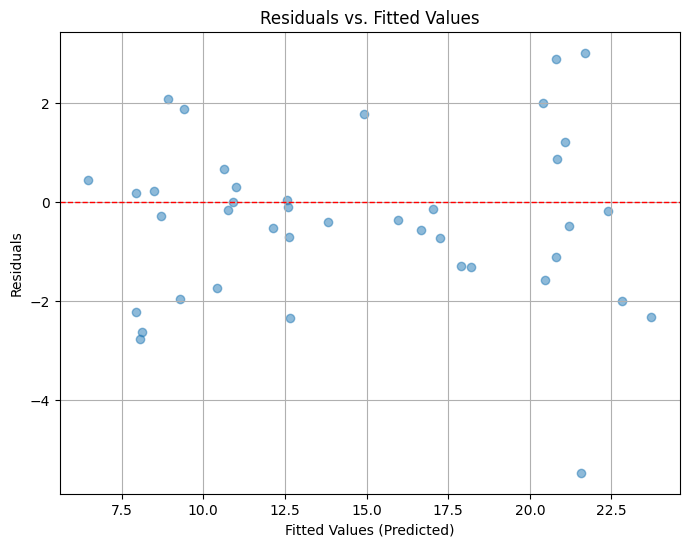

In [35]:
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, res, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.xlabel("Fitted Values (Predicted)")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values")
plt.grid(True)
plt.show()

In [36]:
model_score = r2_score(y_test, y_pred)
model_score

0.9059011844150826

In [40]:
mse = mean_absolute_error(y_test, y_pred)
mse

1.2748262109549338

In [41]:
rmse = np.sqrt(mean_absolute_error(y_test, y_pred))
rmse

1.1290820213584722

## Conclusion

Our model's r2_score is 90% while the rmse is less than mse so this is an indicator that our model has no large errors.